In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Data Loading ---
print("--- 1. Loading the White Wine Dataset ---")

try:
    df_white = pd.read_csv('data/winequality-white.csv', sep=';')
    print("Data successfully loaded.")
except FileNotFoundError:
    print(f"Error: The file 'data/winequality-white.csv' was not found. Please check the file path.")
    exit()



--- 1. Loading the White Wine Dataset ---
Data successfully loaded.


In [8]:
# --- 2. Structural Overview and Data Quality Check (Phase 1: EDA) ---
print("\n--- 2. Structural Overview and Data Quality Check ---")

print("\n** First 5 Rows (Head) **")
print(df_white.head())

print("\n** Dimensions (Shape) **")
print(f"The dataset contains {df_white.shape[0]} rows (instances) and {df_white.shape[1]} columns (features).")

print("\n** Data Types and Missing Values (Info) **")
df_white.info()



--- 2. Structural Overview and Data Quality Check ---

** First 5 Rows (Head) **
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   a

There are no missing values in this dataset, so we don't need to do a specific data clean before starting analyzing.

In [11]:
# --- 3. Basic Descriptive Analysis ---
print("\n--- 3. Basic Descriptive Analysis (Describe) ---")
# Display the transpose for better readability
print(df_white.describe().T) 




--- 3. Basic Descriptive Analysis (Describe) ---
                       count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.8779

Quality is therefore a int from 3 to 9 for white wines



--- 4. Target Variable ('quality') Distribution Analysis ---

** Sample Count per Quality Score **
         Sample Count
quality              
3                  20
4                 163
5                1457
6                2198
7                 880
8                 175
9                   5


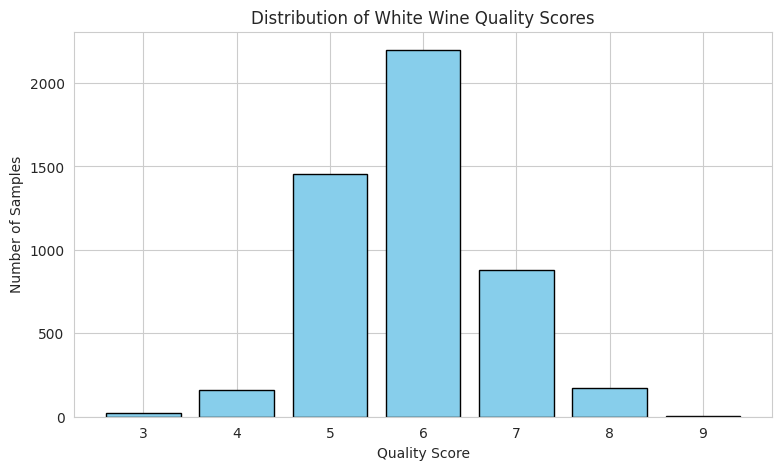

In [33]:
# --- 4. Visualization and Count of the Target Variable ('quality') ---
print("\n--- 4. Target Variable ('quality') Distribution Analysis ---")

# 1. Calculate the exact count for each quality score
quality_counts = df_white['quality'].value_counts().sort_index()

print("\n** Sample Count per Quality Score **")
# Convert the Series to a DataFrame for cleaner table display
quality_table = pd.DataFrame(quality_counts)
quality_table.columns = ['Sample Count']
print(quality_table)

# 2. Visualization (Histogram)
plt.figure(figsize=(9, 5))
plt.hist(df_white['quality'], bins=range(3, 11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of White Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Number of Samples')
plt.show()

In [7]:
# --- 5. Correlation Analysis with the Target ---
print("\n--- 5. Feature Correlation with Quality ---")
# Calculate correlation, sort by relevance to 'quality'
correlation_to_quality = df_white.corr()['quality'].sort_values(ascending=False)
print(correlation_to_quality)


--- 5. Feature Correlation with Quality ---
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


We can observe some features more correlated to quality than others. For instance, we k now that alcohol is gonna be important while citric acid might be impactless.